In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings( "ignore")

In [523]:
data = pd.read_excel('Company_Data.xlsx')
data.head()

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current Assets   ...  PBIDTM (%)[Latest]  PBITM (%)[Latest]  \
0            40.50  ...                0.00               0.00   
1           486.86  ...              -10.30             -39.74   
2          9097.64  ...            -5279.14           -5516.98   
3          1034.12  ...               -3.33              -7.21   
4          4685.81  ...             -295.55            -400.55   

   PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                        0                          0   
1                       29                        101   
2                       97                        558   
3                       93                         63   
4                     3887                        346   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                      45.00                          0.00   
1                       2.00                          0.31   
2                       0.00                         -0.03   
3                       2.00                          0.24   
4                       0.00                          0.01   

   Value of Output/Gross Block  
0                         0.00  
1                         0.24  
2                        -0.26  
3                         1.90  
4                         0.05  

[5 rows x 67 columns]

In [524]:
data.columns = data.columns.str.replace('-', '_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_').str.replace(',','').str.replace('[', '_').str.replace(']', '').str.replace('.', '').str.replace('Velocity', 'Vel').str.replace('earnings', 'earn').str.replace('expenses', 'exp').str.replace('Production', 'Prod').str.replace('Liabilities', 'Liab').str.replace('Provisions', 'Prov').str.replace('Current', 'Curr').str.replace('Revenue','Rev').str.replace('Operating_Activities','Opr').str.replace('Investing_Activities','Inv').str.replace('Financing_Activities','Fin')

C:\Users\Shwetha\AppData\Local\Temp/ipykernel_9112/3230895737.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.replace('-', '_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_').str.replace(',','').str.replace('[', '_').str.replace(']', '').str.replace('.', '').str.replace('Velocity', 'Vel').str.replace('earnings', 'earn').str.replace('expenses', 'exp').str.replace('Production', 'Prod').str.replace('Liabilities', 'Liab').str.replace('Provisions', 'Prov').str.replace('Current', 'Curr').str.replace('Revenue','Rev').str.replace('Operating_Activities','Opr').str.replace('Investing_Activities','Inv').str.replace('Financing_Activities','Fin')


In [525]:
print('The number of rows (observations) is',data.shape[0],'\n''The number of columns (variables) is',data.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [526]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Co_Code                            3586 non-null   int64  
 1   Co_Name                            3586 non-null   object 
 2   Networth_Next_Year                 3586 non-null   float64
 3   Equity_Paid_Up                     3586 non-null   float64
 4   Networth                           3586 non-null   float64
 5   Capital_Employed                   3586 non-null   float64
 6   Total_Debt                         3586 non-null   float64
 7   Gross_Block_                       3586 non-null   float64
 8   Net_Working_Capital_               3586 non-null   float64
 9   Curr_Assets_                       3586 non-null   float64
 10  Curr_Liab_and_Prov_                3586 non-null   float64
 11  Total_Assets_to_Liab_              3586 non-null   float

In [527]:
data.describe()

Co_Code  Networth_Next_Year  Equity_Paid_Up  Networth  \
count  3586.00             3586.00         3586.00   3586.00   
mean  16065.39              725.05           62.97    649.75   
std   19776.82             4769.68          778.76   4091.99   
min       4.00            -8021.60            0.00  -7027.48   
25%    3029.25                3.98            3.75      3.89   
50%    6077.50               19.02            8.29     18.58   
75%   24269.50              123.80           19.52    117.30   
max   72493.00           111729.10        42263.46  81657.35   

       Capital_Employed  Total_Debt  Gross_Block_  Net_Working_Capital_  \
count           3586.00     3586.00       3586.00               3586.00   
mean            2799.61     1994.82        594.18                410.81   
std            26975.14    23652.84       4871.55               6301.22   
min            -1824.75       -0.72        -41.19             -13162.42   
25%                7.60        0.03          0.57                  0.94   
50%               39.09        7.49         15.87                 10.14   
75%              226.60       72.35        131.90                 61.17   
max           714001.25   652823.81     128477.59             223257.56   

       Curr_Assets_  Curr_Liab_and_Prov_  ...  PBIDTM_perc_Latest  \
count       3586.00              3586.00  ...             3585.00   
mean        1960.35               391.99  ...              -51.16   
std        22577.57              2675.00  ...             1795.13   
min           -0.91                -0.23  ...           -78870.45   
25%            4.00                 0.73  ...                0.00   
50%           24.54                 9.23  ...                8.07   
75%          135.28                65.65  ...               18.99   
max       721166.00             83232.98  ...            19233.33   

       PBITM_perc_Latest  PBDTM_perc_Latest  CPM_perc_Latest  \
count            3585.00            3585.00          3585.00   
mean             -109.21            -311.57          -307.01   
std              3057.64           10921.59         10676.15   
min           -141600.00         -590500.00       -572000.00   
25%                 0.00               0.00             0.00   
50%                 5.23               4.69             3.89   
75%                14.29              14.11            11.39   
max             19195.70           15640.00         15640.00   

       APATM_perc_Latest  Debtors_Vel_Days  Creditors_Vel_Days  \
count            3585.00           3586.00             3586.00   
mean             -365.06            603.89             2057.85   
std             12500.05          10636.76            54169.48   
min           -688600.00              0.00                0.00   
25%                 0.00              8.00                8.00   
50%                 1.59             49.00               39.00   
75%                 7.41            106.00               89.00   
max             15266.67         514721.00          2034145.00   

       Inventory_Vel_Days  Value_of_Output_to_Total_Assets  \
count             3483.00                          3586.00   
mean                79.64                             0.82   
std                137.85                             1.20   
min               -199.00                            -0.33   
25%                  0.00                             0.07   
50%                 35.00                             0.48   
75%                 96.00                             1.16   
max                996.00                            17.63   

       Value_of_Output_to_Gross_Block  
count                         3586.00  
mean                            61.88  
std                            976.82  
min                            -61.00  
25%                              0.27  
50%                              1.53  
75%                              4.91  
max                          43404.00  

[8 rows x 66 columns]

In [528]:
pd.options.display.float_format = '{:.2f}'.format   
data.describe().T

count     mean      std      min     25%  \
Co_Code                         3586.00 16065.39 19776.82     4.00 3029.25   
Networth_Next_Year              3586.00   725.05  4769.68 -8021.60    3.98   
Equity_Paid_Up                  3586.00    62.97   778.76     0.00    3.75   
Networth                        3586.00   649.75  4091.99 -7027.48    3.89   
Capital_Employed                3586.00  2799.61 26975.14 -1824.75    7.60   
...                                 ...      ...      ...      ...     ...   
Debtors_Vel_Days                3586.00   603.89 10636.76     0.00    8.00   
Creditors_Vel_Days              3586.00  2057.85 54169.48     0.00    8.00   
Inventory_Vel_Days              3483.00    79.64   137.85  -199.00    0.00   
Value_of_Output_to_Total_Assets 3586.00     0.82     1.20    -0.33    0.07   
Value_of_Output_to_Gross_Block  3586.00    61.88   976.82   -61.00    0.27   

                                    50%      75%        max  
Co_Code                         6077.50 24269.50   72493.00  
Networth_Next_Year                19.02   123.80  111729.10  
Equity_Paid_Up                     8.29    19.52   42263.46  
Networth                          18.58   117.30   81657.35  
Capital_Employed                  39.09   226.60  714001.25  
...                                 ...      ...        ...  
Debtors_Vel_Days                  49.00   106.00  514721.00  
Creditors_Vel_Days                39.00    89.00 2034145.00  
Inventory_Vel_Days                35.00    96.00     996.00  
Value_of_Output_to_Total_Assets    0.48     1.16      17.63  
Value_of_Output_to_Gross_Block     1.53     4.91   43404.00  

[66 rows x 8 columns]

In [529]:
data['default'] = np.where((data['Networth_Next_Year'] > 0), 0, 1)

In [530]:
data[['default','Networth_Next_Year']].head()

default  Networth_Next_Year
0        1            -8021.60
1        1            -3986.19
2        1            -3192.58
3        1            -3054.51
4        1            -2967.36

In [531]:
data['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [532]:
data = data.drop(['Co_Code', 'Co_Name','Networth_Next_Year'],axis = 1)

<b>1.Outlier Treatment

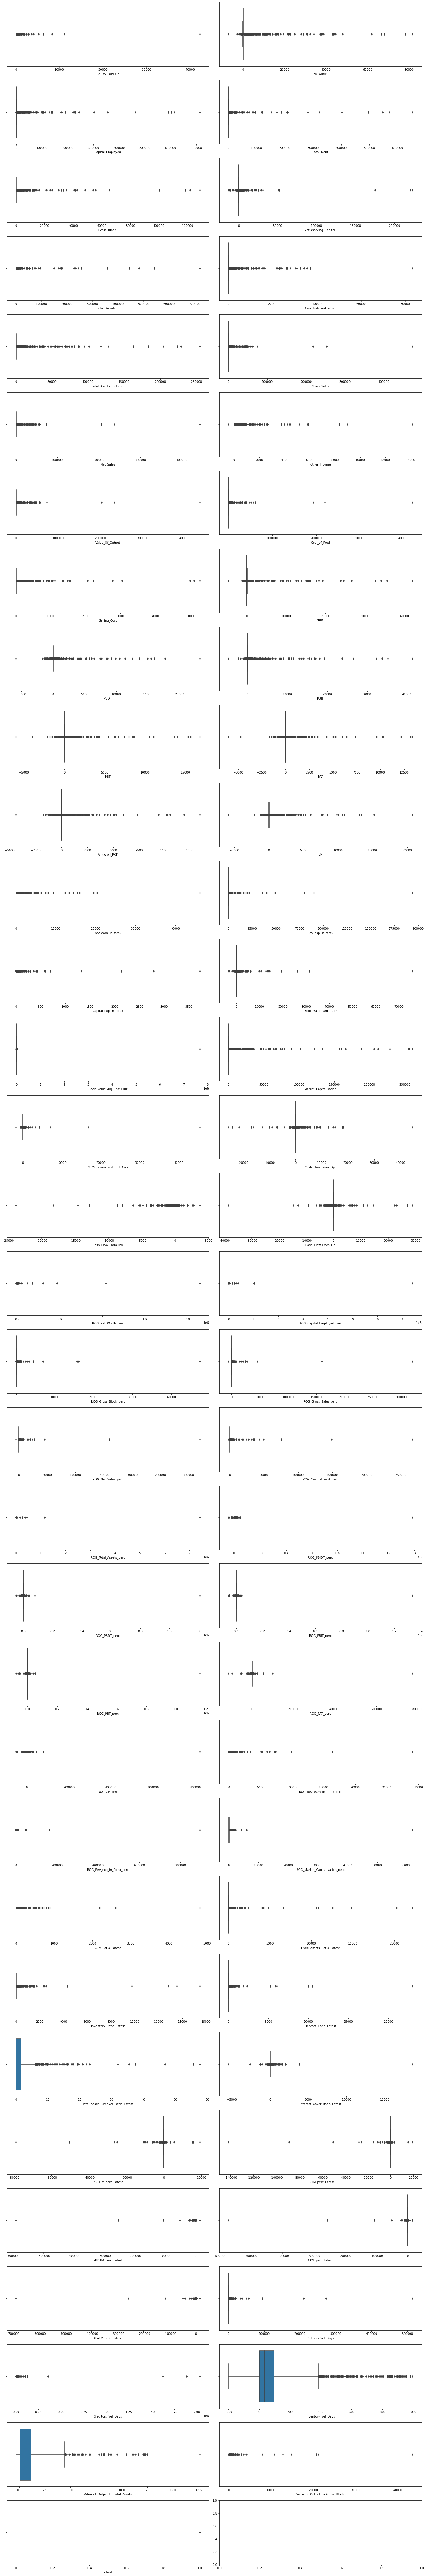

In [533]:
fig, ax = plt.subplots(figsize = (20, 120), nrows = 33, ncols = 2)
for i, col in enumerate(data.columns):
    sns.boxplot(x = data[col], ax = ax[i//2, i%2], whis = 3) 
plt.tight_layout(pad = 1.1)

In [534]:
data.isnull().sum()

Equity_Paid_Up                       0
Networth                             0
Capital_Employed                     0
Total_Debt                           0
Gross_Block_                         0
                                  ... 
Creditors_Vel_Days                   0
Inventory_Vel_Days                 103
Value_of_Output_to_Total_Assets      0
Value_of_Output_to_Gross_Block       0
default                              0
Length: 65, dtype: int64

In [535]:
print('Total outliers:',data.isnull().sum().sum())
print('Total size of the dataset',data.size)
print('Ratio of outliers present in the dataset',(data.isnull().sum().sum())/data.size)

Total outliers: 118
Total size of the dataset 233090
Ratio of outliers present in the dataset 0.000506242224033635


In [536]:
data_1 = data.drop('default', axis = 1)
data_1a = data['default']

In [537]:
Q1 = data_1.quantile(0.25)
Q3 = data_1.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [538]:
((data_1 > UL) | (data_1 < LL)).sum()

Equity_Paid_Up                     448
Networth                           650
Capital_Employed                   596
Total_Debt                         583
Gross_Block_                       540
                                  ... 
Debtors_Vel_Days                   398
Creditors_Vel_Days                 391
Inventory_Vel_Days                 262
Value_of_Output_to_Total_Assets    150
Value_of_Output_to_Gross_Block     481
Length: 64, dtype: int64

In [539]:
data_1[((data_1 > UL) | (data_1 < LL))]= np.nan

In [540]:
data_1.isnull().sum()

Equity_Paid_Up                     448
Networth                           650
Capital_Employed                   596
Total_Debt                         583
Gross_Block_                       540
                                  ... 
Debtors_Vel_Days                   398
Creditors_Vel_Days                 391
Inventory_Vel_Days                 365
Value_of_Output_to_Total_Assets    150
Value_of_Output_to_Gross_Block     481
Length: 64, dtype: int64

In [541]:
print('Total Null values:',data_1.isnull().sum().sum())
print('Total size of the dataset',data_1.size)
print('Ratio of total Null present in the dataset',(data_1.isnull().sum().sum())/(data_1.size))

Total Null values: 41473
Total size of the dataset 229504
Ratio of total Null present in the dataset 0.18070709007250418


In [542]:
data_1.isnull().sum().sum()

41473

In [543]:
data_1.size

229504

In [544]:
(data_1.isnull().sum().sum())/(data_1.size)

0.18070709007250418

In [516]:
data_1.shape

(3586, 65)

<b>1.2 Missing Value Treatment

In [545]:
data_combine = pd.concat([data_1, data_1a], axis =1 )

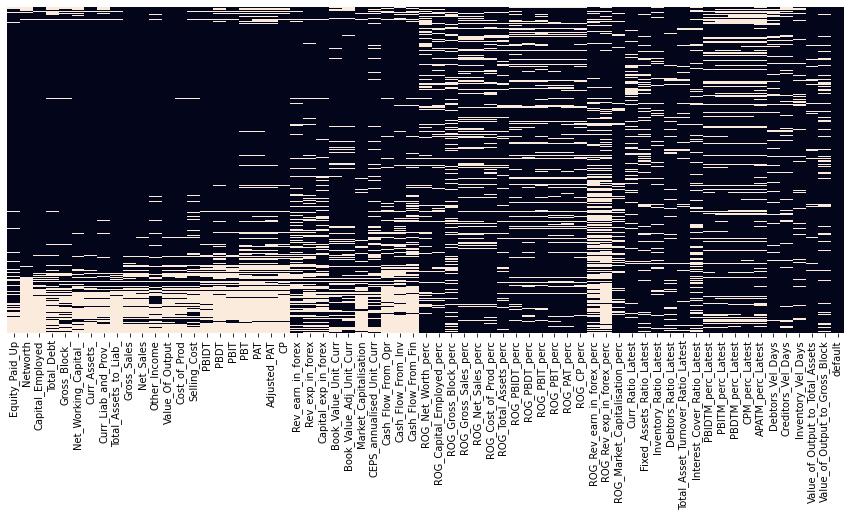

In [468]:
plt.figure(figsize = (15,6))
sns.heatmap(data_combine.isnull(), cbar = False, yticklabels = False)
plt.show()

In [546]:
data_combine.isnull().sum(axis = 1)

0       19
1       34
2       43
3       36
4       35
        ..
3581    30
3582    36
3583    34
3584    30
3585    36
Length: 3586, dtype: int64

In [547]:
data_combine_temp = data_combine[data_combine.isnull().sum(axis = 1) >= 5]
data_combine_temp

Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  Gross_Block_  \
0                NaN       NaN               NaN         NaN           NaN   
1                NaN       NaN               NaN         NaN           NaN   
2                NaN       NaN               NaN         NaN           NaN   
3                NaN       NaN               NaN         NaN           NaN   
4                NaN       NaN               NaN         NaN           NaN   
...              ...       ...               ...         ...           ...   
3581             NaN       NaN               NaN         NaN           NaN   
3582             NaN       NaN               NaN         NaN           NaN   
3583             NaN       NaN               NaN         NaN           NaN   
3584             NaN       NaN               NaN         NaN           NaN   
3585             NaN       NaN               NaN         NaN           NaN   

      Net_Working_Capital_  Curr_Assets_  Curr_Liab_and_Prov_  \
0                      NaN         40.50                  NaN   
1                      NaN           NaN                  NaN   
2                      NaN           NaN                  NaN   
3                      NaN           NaN                  NaN   
4                      NaN           NaN                  NaN   
...                    ...           ...                  ...   
3581                  0.00           NaN                  NaN   
3582                   NaN           NaN                  NaN   
3583                   NaN           NaN                  NaN   
3584                   NaN           NaN                  NaN   
3585                   NaN           NaN                  NaN   

      Total_Assets_to_Liab_  Gross_Sales  ...  PBITM_perc_Latest  \
0                    109.60         0.00  ...               0.00   
1                       NaN          NaN  ...                NaN   
2                       NaN       392.13  ...                NaN   
3                       NaN          NaN  ...              -7.21   
4                       NaN        38.72  ...                NaN   
...                     ...          ...  ...                ...   
3581                    NaN          NaN  ...               0.00   
3582                    NaN          NaN  ...              32.17   
3583                    NaN          NaN  ...               6.69   
3584                    NaN          NaN  ...              20.55   
3585                    NaN          NaN  ...              22.88   

      PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  Debtors_Vel_Days  \
0                  0.00             0.00               0.00              0.00   
1                   NaN              NaN                NaN             29.00   
2                   NaN              NaN                NaN             97.00   
3                   NaN              NaN                NaN             93.00   
4                   NaN              NaN                NaN               NaN   
...                 ...              ...                ...               ...   
3581               0.00             0.00               0.00              0.00   
3582              29.81              NaN                NaN             13.00   
3583               7.31             5.69               4.29              7.00   
3584              23.39            19.55              11.99             32.00   
3585              34.04            25.97               6.37             18.00   

      Creditors_Vel_Days  Inventory_Vel_Days  Value_of_Output_to_Total_Assets  \
0                   0.00               45.00                             0.00   
1                 101.00                2.00                             0.31   
2                    NaN                0.00                            -0.03   
3                  63.00                2.00                             0.24   
4                    NaN                0.00                             0.01   
...         

In [548]:
data_combine_temp.shape

(2618, 65)

In [549]:
data_combine_temp['default'].value_counts()

0    2326
1     292
Name: default, dtype: int64

In [550]:
data_combine_temp['default'].value_counts()[1]/data['default'].value_counts()[1]

0.7525773195876289

In [551]:
data_combine.isnull().sum().sort_values(ascending = False)/data_combine.index.size

ROG_Rev_exp_in_forex_perc           0.45
ROG_Rev_earn_in_forex_perc          0.37
Cash_Flow_From_Fin                  0.28
PAT                                 0.27
Adjusted_PAT                        0.27
                                    ... 
Debtors_Ratio_Latest                0.10
Inventory_Vel_Days                  0.10
Total_Asset_Turnover_Ratio_Latest   0.06
Value_of_Output_to_Total_Assets     0.04
default                             0.00
Length: 65, dtype: float64

In [552]:
data_combine.drop(['ROG_Rev_exp_in_forex_perc','ROG_Rev_earn_in_forex_perc','Cash_Flow_From_Fin','PAT','Adjusted_PAT','PBT','APATM_perc_Latest'],axis = 1,inplace = True)

In [553]:
data_combine.shape

(3586, 58)

In [554]:
data_combine_drop = data_combine.drop(['default'],axis = 1)

In [555]:
from sklearn.impute import KNNImputer

In [556]:
imputer = KNNImputer(n_neighbors=18)

In [557]:
data_imputed = pd.DataFrame(imputer.fit_transform(data_combine_drop), columns = data_combine_drop.columns)

In [558]:
data_imputed

Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  Gross_Block_  \
0              23.10     59.66             54.16       61.48        117.24   
1               9.75     15.79             46.66       11.00         23.38   
2              16.00    171.21            338.85       64.66        187.35   
3              14.30     73.67            189.19       41.56        121.66   
4              25.73    158.50            355.22       33.60        174.02   
...              ...       ...               ...         ...           ...   
3581            9.84     18.46             38.30        1.33         32.64   
3582            9.19     71.48            147.81       21.77         59.01   
3583           10.54     79.15            151.67       28.36         99.69   
3584           16.13     93.43            141.75       37.92         78.05   
3585            9.61     29.84             82.67       18.98         16.39   

      Net_Working_Capital_  Curr_Assets_  Curr_Liab_and_Prov_  \
0                     3.25         40.50                41.54   
1                     3.70         10.05                 6.77   
2                    73.90        215.60               108.59   
3                    52.64         93.46                46.13   
4                    29.16        204.82                98.30   
...                    ...           ...                  ...   
3581                  0.00         10.92                 2.26   
3582                  6.97         72.72                37.67   
3583                 19.43         65.68                56.36   
3584                 29.95         90.48                51.68   
3585                  9.09         40.45                26.35   

      Total_Assets_to_Liab_  Gross_Sales  ...  Interest_Cover_Ratio_Latest  \
0                    109.60         0.00  ...                        -0.20   
1                     53.43         8.40  ...                        -0.84   
2                    522.48       392.13  ...                        -2.21   
3                    253.65       151.12  ...                        -0.16   
4                    516.09        38.72  ...                        -0.73   
...                     ...          ...  ...                          ...   
3581                  40.56         6.22  ...                         0.00   
3582                 196.14       124.77  ...                         3.18   
3583                 192.81       256.91  ...                         8.60   
3584                 192.50       195.56  ...                         4.35   
3585                 115.88        64.65  ...                         2.71   

      PBIDTM_perc_Latest  PBITM_perc_Latest  PBDTM_perc_Latest  \
0                   0.00               0.00               0.00   
1                 -10.30               3.02               1.46   
2                  16.53               9.65               5.46   
3                  -3.33              -7.21               7.39   
4                  19.60              11.69               7.97   
...                  ...                ...                ...   
3581                0.00               0.00               0.00   
3582               39.92              32.17              29.81   
3583                8.09               6.69               7.31   
3584               28.12              20.55              23.39   
3585               42.47              22.88              34.04   

      CPM_perc_Latest  Debtors_Vel_Days  Creditors_Vel_Days  \
0                0.00              0.00                0.00   
1                2.10             29.00              101.00   
2                4.49             97.00               67.11   
3                5.12             93.00               63.00   
4               10.00             55.17               64.83   
...               ...               ...                 ...   
3581             0.00              0.00                0.00   
3582            10.68             13.00               

<b>1.4 Univariate (4 marks) & Bivariate ( 6marks) analysis with proper interpretation. (You may choose to include only those variables which were significant in the model building)

C:\Users\Shwetha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


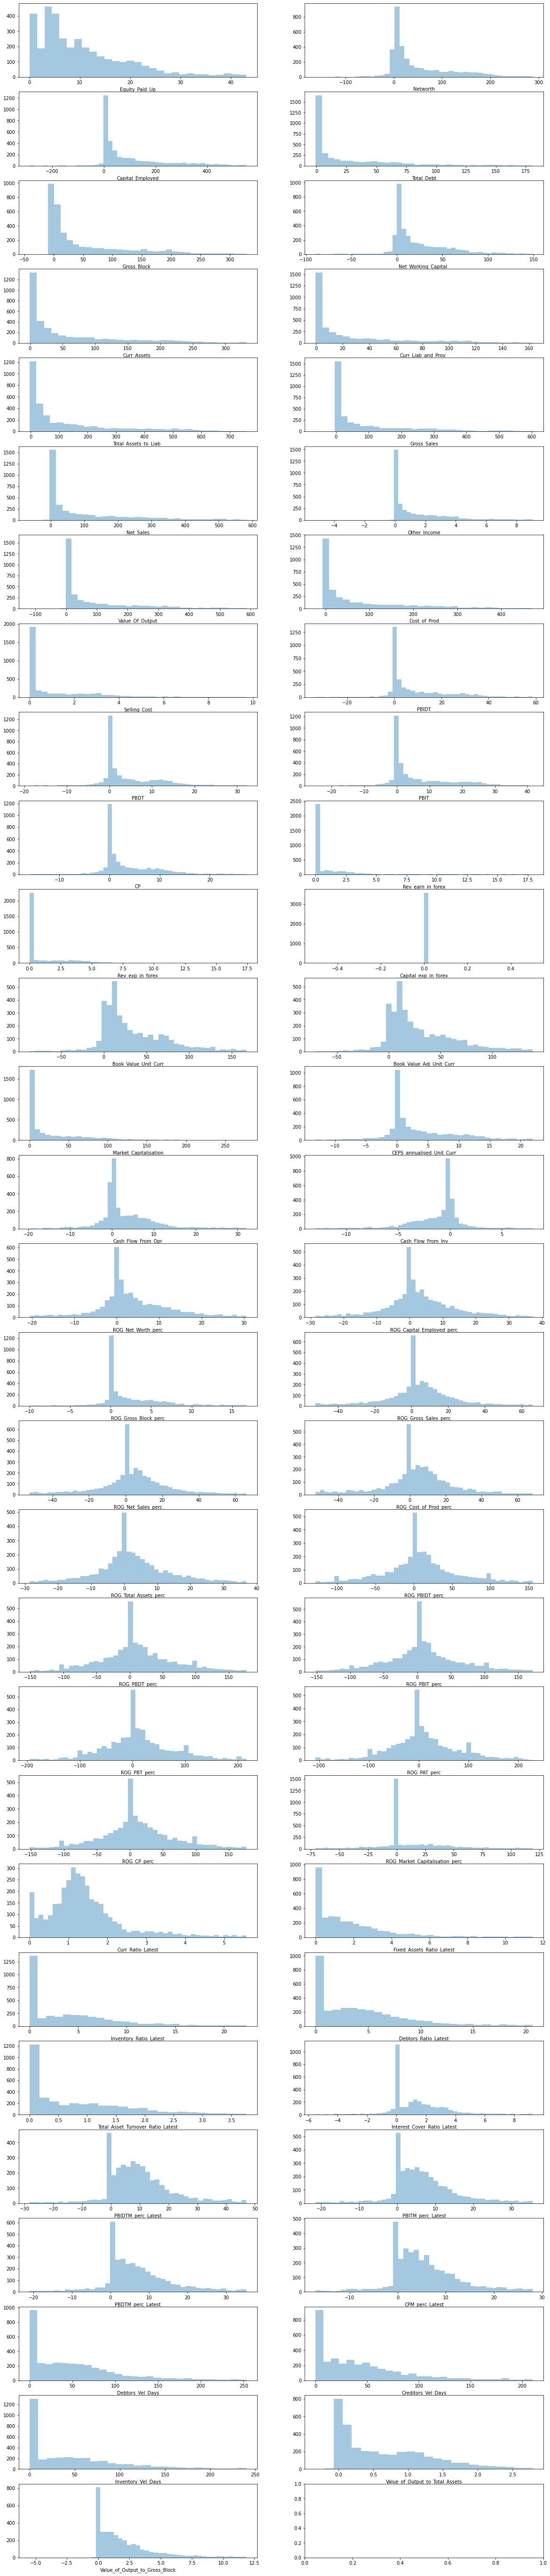

In [487]:
fig, ax = plt.subplots(figsize = (20, 100), nrows = 29, ncols = 2)
for i, col in enumerate(data_imputed.columns):
        sns.distplot(data_imputed[col], ax = ax[i//2, i%2], kde = False)

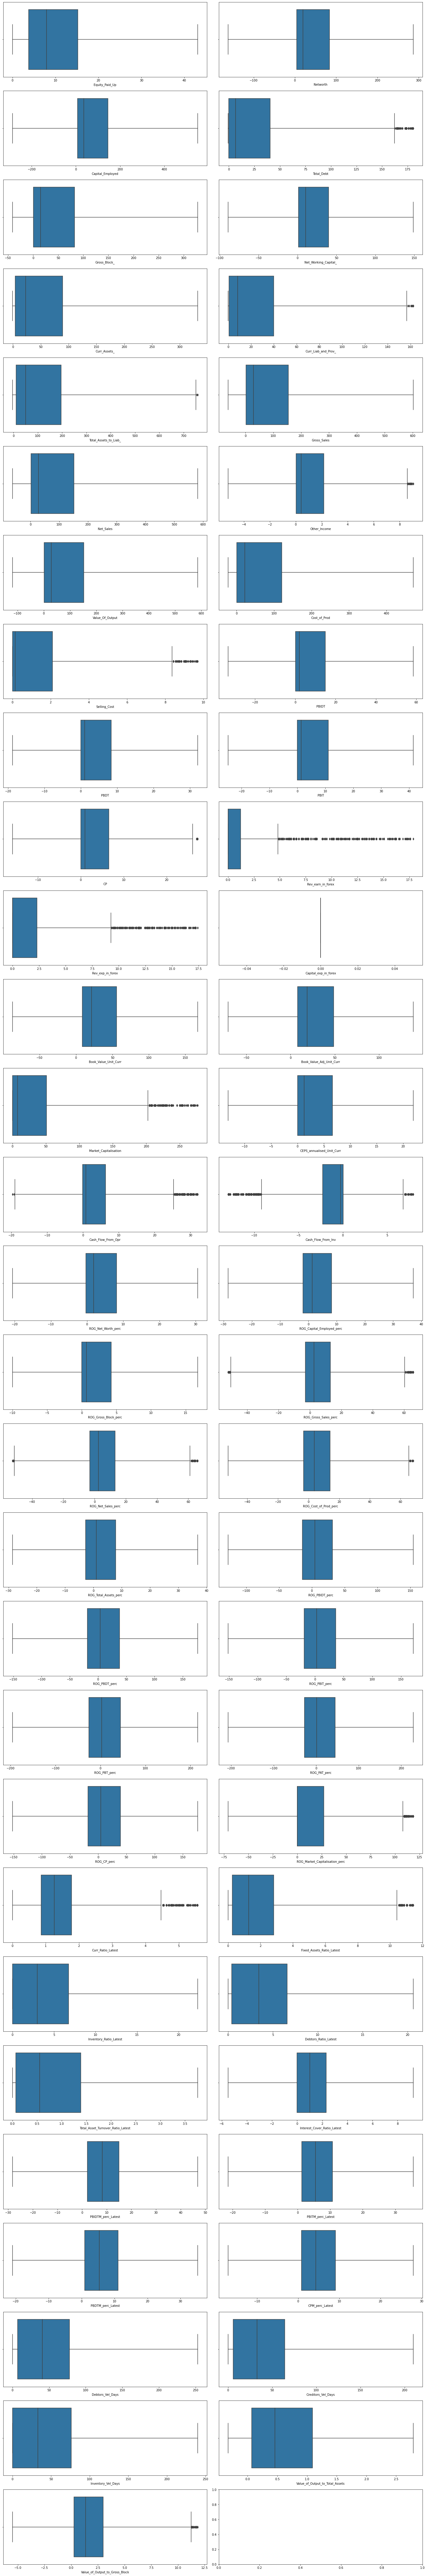

In [488]:
fig, ax = plt.subplots(figsize = (20, 120), nrows = 29, ncols = 2)
for i, col in enumerate(data_imputed.columns):
    sns.boxplot(x = data_imputed[col], ax = ax[i//2, i%2], whis = 3)    
plt.tight_layout(pad = 1.1)

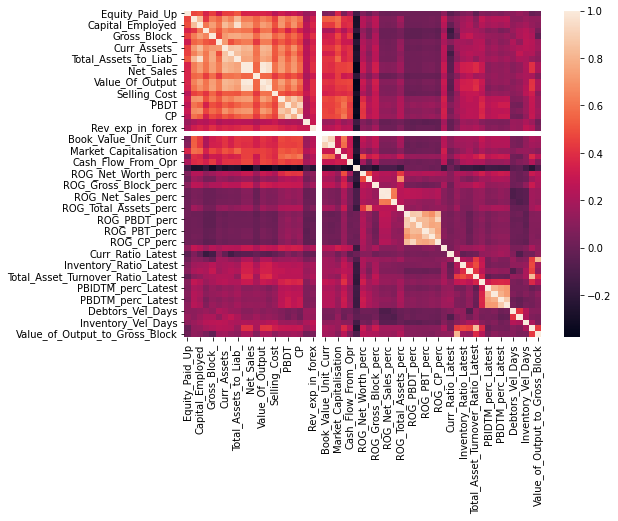

In [489]:
plt.figure(figsize = (8,6))
cor_matrix = data_imputed.corr()
sns.heatmap(cor_matrix);

In [490]:
data_imputed = data_imputed.drop(['Rev_exp_in_forex'],axis = 1)

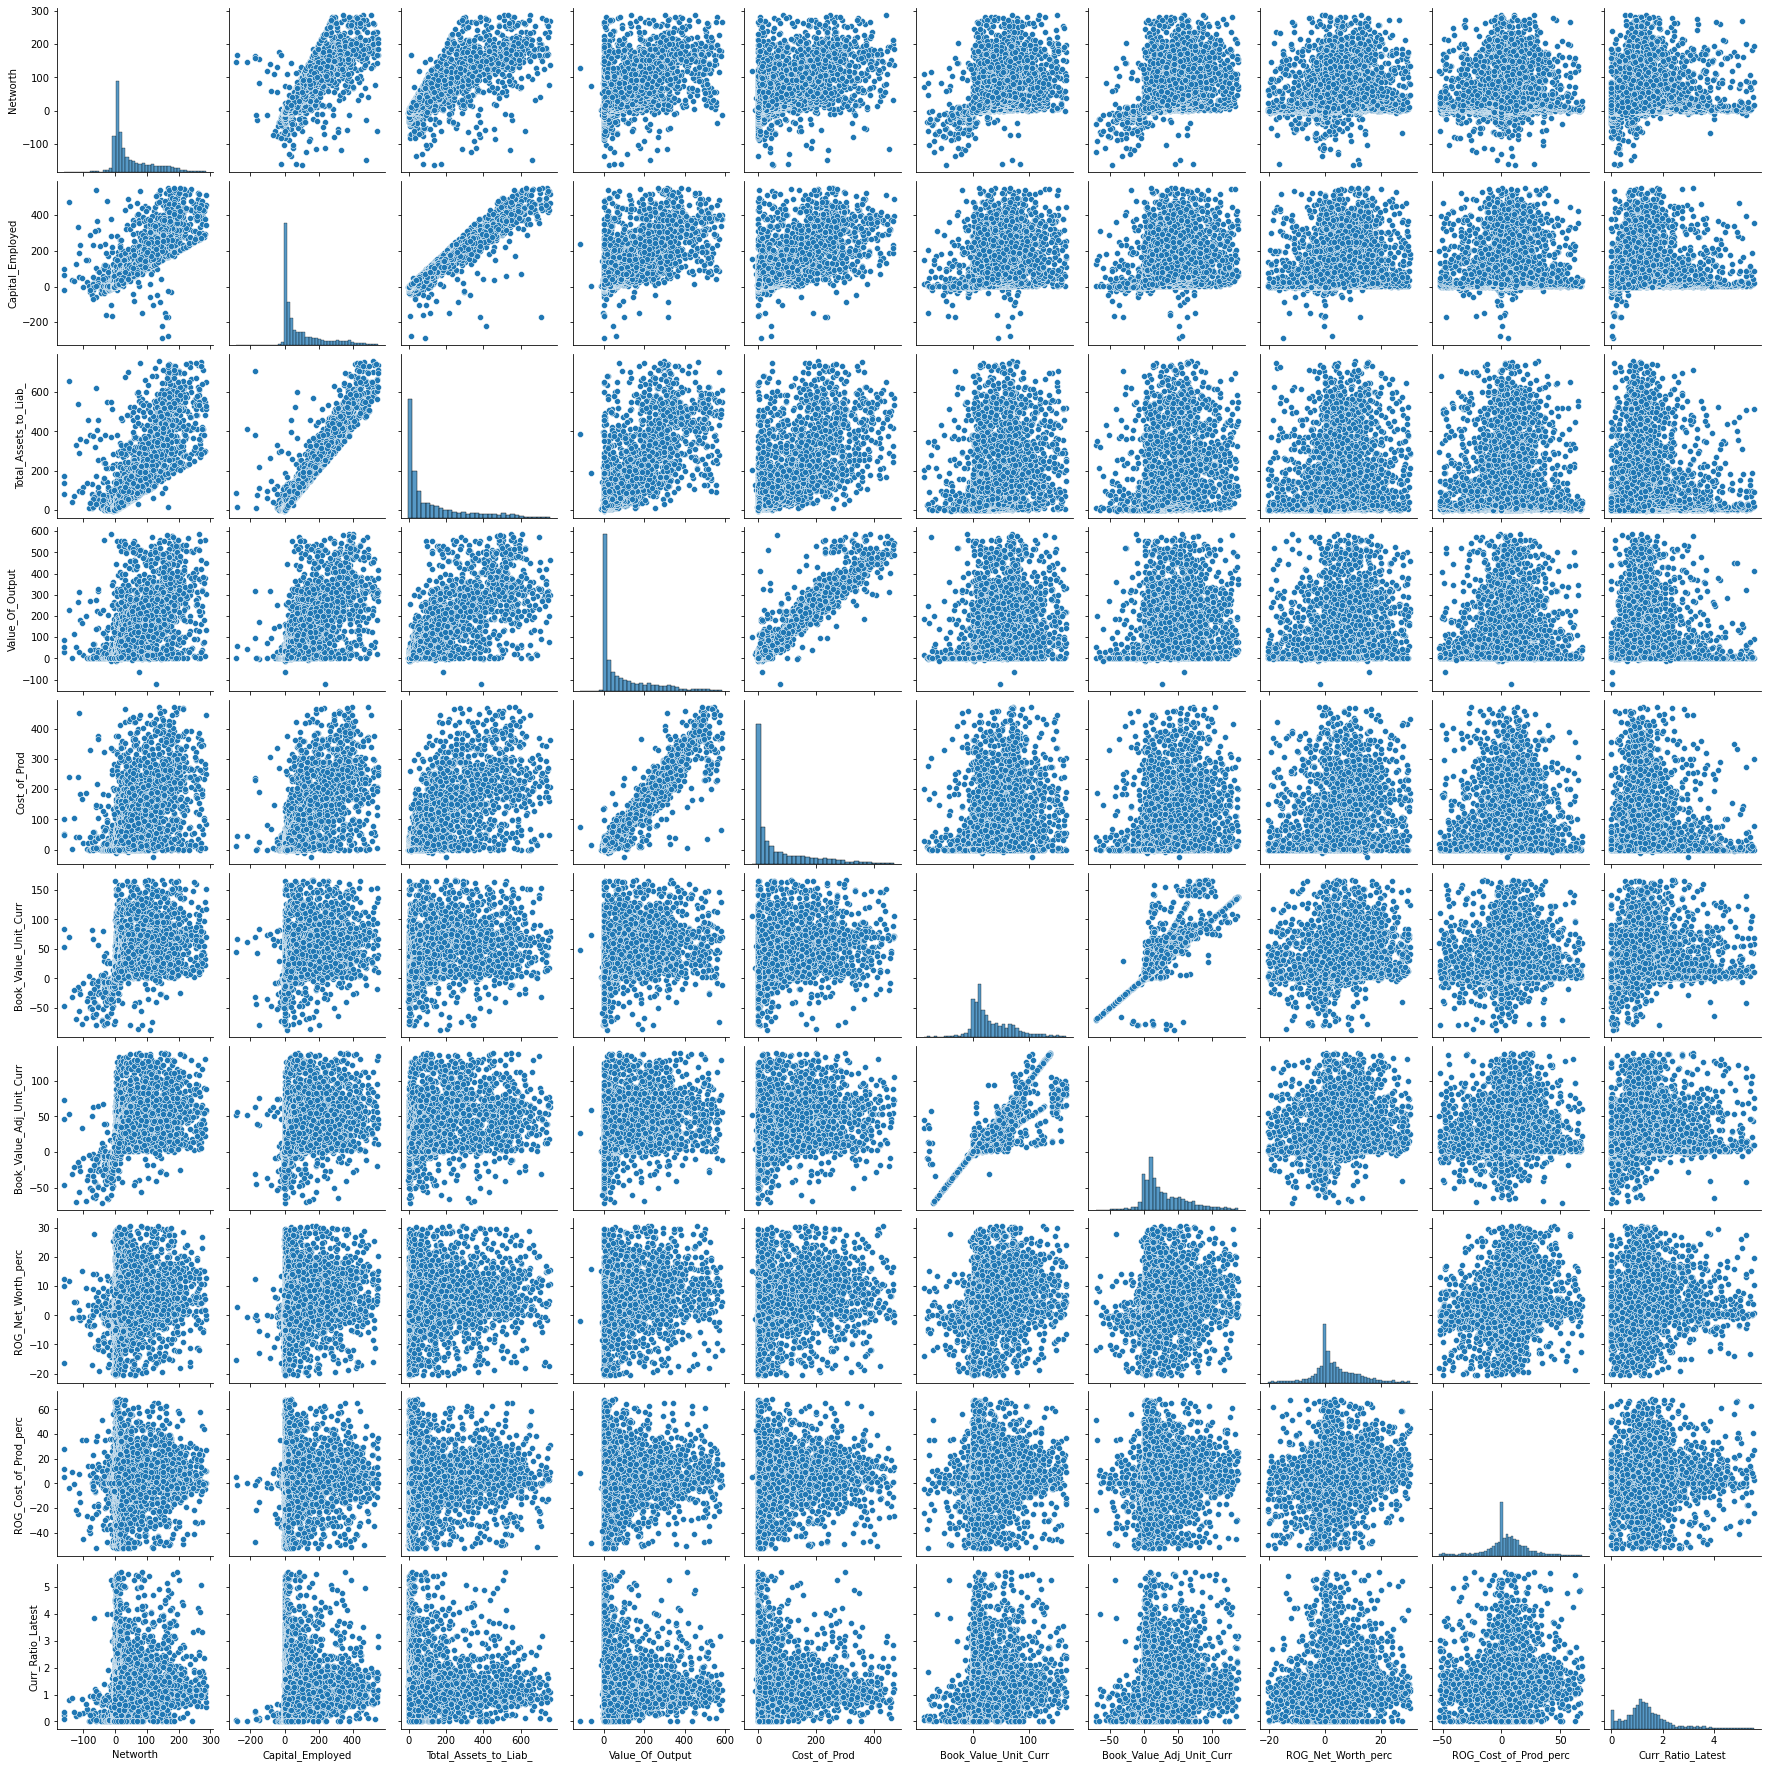

In [559]:
col = ['Networth','Capital_Employed','Total_Assets_to_Liab_','Value_Of_Output','Cost_of_Prod','Book_Value_Unit_Curr','Book_Value_Adj_Unit_Curr','ROG_Net_Worth_perc','ROG_Cost_of_Prod_perc','Curr_Ratio_Latest']
sns.pairplot(data_imputed[col]);
plt.savefig('Pairplot.jpg');

<b>1.5 Train Test Split

In [565]:
response = data_combine['default']

In [562]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(data_imputed), columns = data_imputed.columns)

In [563]:
data_combine2 = pd.concat([scaled_predictors, response], axis = 1)

In [573]:
data_combine2.columns

Index(['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt',
       'Gross_Block_', 'Net_Working_Capital_', 'Curr_Assets_',
       'Curr_Liab_and_Prov_', 'Total_Assets_to_Liab_', 'Gross_Sales',
       'Net_Sales', 'Other_Income', 'Value_Of_Output', 'Cost_of_Prod',
       'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'CP', 'Rev_earn_in_forex',
       'Rev_exp_in_forex', 'Capital_exp_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Opr', 'Cash_Flow_From_Inv',
       'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc',
       'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Prod_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc',
       'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc',
       'ROG_CP_perc', 'ROG_Market_Capitalisation_perc', 'Curr_Ratio_Latest',
       'Fixed_Assets_Ratio_Latest', 'Inventory_Ratio_Latest',
       'Debto

In [574]:
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(data_combine2, test_size = 0.33, stratify = data_combine2.default, random_state = 42)

In [575]:
data_imputed_train = pd.DataFrame(imputer.fit_transform(Train), columns = Train.columns)
data_imputed_test = pd.DataFrame(imputer.transform(Test), columns = Test.columns)

<b>1.6 Build Logistic Regression Model (using statsmodel library) on most important variables on Train Dataset and choose the optimum cutoff. Also showcase your model building approach

In [325]:
import statsmodels.formula.api as SM

In [572]:
model1 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Net_Working_Capital_+ Curr_Assets_+Curr_Liab_and_Prov_+ Total_Assets_to_Liab_+ Gross_Sales+Net_Sales+ Other_Income+ Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+ PBDT+ PBIT+ CP+ Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ Market_Capitalisation+CEPS_annualised_Unit_Curr+ Cash_Flow_From_Opr+ Cash_Flow_From_Inv+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ ROG_Net_Sales_perc+ROG_Cost_of_Prod_perc+ ROG_Total_Assets_perc+ ROG_PBIDT_perc+ROG_PBDT_perc+ ROG_PBIT_perc+ ROG_PBT_perc+ ROG_PAT_perc+ROG_CP_perc+ ROG_Market_Capitalisation_perc+ Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest+Debtors_Ratio_Latest+ Total_Asset_Turnover_Ratio_Latest+Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest+PBITM_perc_Latest+ PBDTM_perc_Latest+ CPM_perc_Latest+Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.123700
         Iterations: 395
         Function evaluations: 397
         Gradient evaluations: 397
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2346
Method:                           MLE   Df Model:                           55
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.6392
Time:                        20:17:11   Log-Likelihood:                -297.13
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.697e-184
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [330]:
model2 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Net_Working_Capital_+ Curr_Assets_+Curr_Liab_and_Prov_+ Total_Assets_to_Liab_+ Gross_Sales+Net_Sales+ Other_Income+ Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+ PBDT+ PBIT+ CP+ Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ Market_Capitalisation+CEPS_annualised_Unit_Curr+ Cash_Flow_From_Opr+ Cash_Flow_From_Inv+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ ROG_Net_Sales_perc+ROG_Cost_of_Prod_perc+ ROG_Total_Assets_perc+ ROG_PBIDT_perc+ROG_PBDT_perc+ ROG_PBIT_perc+ ROG_PBT_perc+ ROG_PAT_perc+ROG_CP_perc+ ROG_Market_Capitalisation_perc+ Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest+ Total_Asset_Turnover_Ratio_Latest+Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest+PBITM_perc_Latest+ PBDTM_perc_Latest+ CPM_perc_Latest+Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.123701
         Iterations: 389
         Function evaluations: 391
         Gradient evaluations: 391
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2347
Method:                           MLE   Df Model:                           54
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6392
Time:                        21:44:07   Log-Likelihood:                -297.13
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                3.829e-185
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [332]:
model3 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Net_Working_Capital_+ Curr_Assets_+Curr_Liab_and_Prov_+ Total_Assets_to_Liab_+ Gross_Sales+Net_Sales+ Other_Income+ Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+ PBDT+ PBIT+ CP+ Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ Market_Capitalisation+ Cash_Flow_From_Opr+ Cash_Flow_From_Inv+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ ROG_Net_Sales_perc+ROG_Cost_of_Prod_perc+ ROG_Total_Assets_perc+ ROG_PBIDT_perc+ROG_PBDT_perc+ ROG_PBIT_perc+ ROG_PBT_perc+ ROG_PAT_perc+ROG_CP_perc+ ROG_Market_Capitalisation_perc+ Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest+ Total_Asset_Turnover_Ratio_Latest+Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest+PBITM_perc_Latest+ PBDTM_perc_Latest+ CPM_perc_Latest+Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model3.summary())

Optimization terminated successfully.
         Current function value: 0.123703
         Iterations: 391
         Function evaluations: 393
         Gradient evaluations: 393
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2348
Method:                           MLE   Df Model:                           53
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6392
Time:                        21:44:55   Log-Likelihood:                -297.14
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                8.587e-186
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [334]:
model4 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Net_Working_Capital_+ Curr_Assets_+Curr_Liab_and_Prov_+ Total_Assets_to_Liab_+ Gross_Sales+Net_Sales+ Other_Income+ Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+ PBDT+ PBIT+ CP+ Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ Market_Capitalisation+ Cash_Flow_From_Opr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ ROG_Net_Sales_perc+ROG_Cost_of_Prod_perc+ ROG_Total_Assets_perc+ ROG_PBIDT_perc+ROG_PBDT_perc+ ROG_PBIT_perc+ ROG_PBT_perc+ ROG_PAT_perc+ROG_CP_perc+ ROG_Market_Capitalisation_perc+ Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest+ Total_Asset_Turnover_Ratio_Latest+Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest+PBITM_perc_Latest+ PBDTM_perc_Latest+ CPM_perc_Latest+Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model4.summary())

Optimization terminated successfully.
         Current function value: 0.123708
         Iterations: 386
         Function evaluations: 389
         Gradient evaluations: 389
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2349
Method:                           MLE   Df Model:                           52
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6392
Time:                        21:46:41   Log-Likelihood:                -297.15
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.916e-186
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [336]:
model5 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Net_Working_Capital_+ Curr_Assets_+Curr_Liab_and_Prov_+ Total_Assets_to_Liab_+ Gross_Sales+Net_Sales+ Other_Income+ Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+ PBDT+ PBIT+ CP+ Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ Cash_Flow_From_Opr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ ROG_Net_Sales_perc+ROG_Cost_of_Prod_perc+ ROG_Total_Assets_perc+ ROG_PBIDT_perc+ROG_PBDT_perc+ ROG_PBIT_perc+ ROG_PBT_perc+ ROG_PAT_perc+ROG_CP_perc+ ROG_Market_Capitalisation_perc+ Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest+ Total_Asset_Turnover_Ratio_Latest+Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest+PBITM_perc_Latest+ PBDTM_perc_Latest+ CPM_perc_Latest+Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model5.summary())

Optimization terminated successfully.
         Current function value: 0.123713
         Iterations: 386
         Function evaluations: 388
         Gradient evaluations: 388
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2350
Method:                           MLE   Df Model:                           51
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6391
Time:                        21:48:00   Log-Likelihood:                -297.16
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                4.241e-187
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [338]:
model6 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Net_Working_Capital_+ Curr_Assets_+Curr_Liab_and_Prov_+ Total_Assets_to_Liab_+ Gross_Sales+Net_Sales+ Other_Income+ Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+ PBDT+ PBIT+ CP+ Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ Cash_Flow_From_Opr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ ROG_Net_Sales_perc+ROG_Cost_of_Prod_perc+ ROG_PBIDT_perc+ROG_PBDT_perc+ ROG_PBIT_perc+ ROG_PBT_perc+ ROG_PAT_perc+ROG_CP_perc+ ROG_Market_Capitalisation_perc+ Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest+ Total_Asset_Turnover_Ratio_Latest+Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest+PBITM_perc_Latest+ PBDTM_perc_Latest+ CPM_perc_Latest+Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model6.summary())

Optimization terminated successfully.
         Current function value: 0.123718
         Iterations: 382
         Function evaluations: 384
         Gradient evaluations: 384
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2351
Method:                           MLE   Df Model:                           50
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6391
Time:                        21:49:04   Log-Likelihood:                -297.17
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                9.306e-188
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [340]:
model7 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Net_Working_Capital_+ Curr_Assets_+Curr_Liab_and_Prov_+ Total_Assets_to_Liab_+ Gross_Sales+Net_Sales+ Other_Income+ Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+ PBDT+ PBIT+ CP+ Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ Cash_Flow_From_Opr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ ROG_Net_Sales_perc+ROG_Cost_of_Prod_perc+ ROG_PBIDT_perc+ROG_PBDT_perc+ ROG_PBIT_perc + ROG_PAT_perc+ROG_CP_perc+ ROG_Market_Capitalisation_perc+ Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest+ Total_Asset_Turnover_Ratio_Latest+Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest+PBITM_perc_Latest+ PBDTM_perc_Latest+ CPM_perc_Latest+Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model7.summary())

Optimization terminated successfully.
         Current function value: 0.123737
         Iterations: 378
         Function evaluations: 380
         Gradient evaluations: 380
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2352
Method:                           MLE   Df Model:                           49
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6391
Time:                        21:49:48   Log-Likelihood:                -297.22
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.084e-188
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [342]:
model8 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Net_Working_Capital_+ Curr_Assets_+Curr_Liab_and_Prov_+ Total_Assets_to_Liab_+ Gross_Sales+Net_Sales+ Other_Income+ Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+ PBDT+ PBIT+ CP+ Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ Cash_Flow_From_Opr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ ROG_Net_Sales_perc+ROG_Cost_of_Prod_perc+ ROG_PBIDT_perc+ROG_PBDT_perc+ ROG_PBIT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc+ Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest+ Total_Asset_Turnover_Ratio_Latest+Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest+PBITM_perc_Latest+ PBDTM_perc_Latest+ CPM_perc_Latest+Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model8.summary())

Optimization terminated successfully.
         Current function value: 0.123754
         Iterations: 380
         Function evaluations: 382
         Gradient evaluations: 382
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2353
Method:                           MLE   Df Model:                           48
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6390
Time:                        21:50:41   Log-Likelihood:                -297.26
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                4.597e-189
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [344]:
model9 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Net_Working_Capital_+ Curr_Assets_+Curr_Liab_and_Prov_+ Total_Assets_to_Liab_+ Gross_Sales+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+ PBDT+ PBIT+ CP+ Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ Cash_Flow_From_Opr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ ROG_Net_Sales_perc+ROG_Cost_of_Prod_perc+ ROG_PBIDT_perc+ROG_PBDT_perc+ ROG_PBIT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc+ Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest+ Total_Asset_Turnover_Ratio_Latest+Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest+PBITM_perc_Latest+ PBDTM_perc_Latest+ CPM_perc_Latest+Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model9.summary())

Optimization terminated successfully.
         Current function value: 0.123778
         Iterations: 360
         Function evaluations: 362
         Gradient evaluations: 362
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2354
Method:                           MLE   Df Model:                           47
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6389
Time:                        21:54:48   Log-Likelihood:                -297.32
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.021e-189
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [346]:
model10 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Net_Working_Capital_+ Curr_Assets_+Curr_Liab_and_Prov_+ Total_Assets_to_Liab_+ Gross_Sales+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT+ CP+ Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ Cash_Flow_From_Opr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ ROG_Net_Sales_perc+ROG_Cost_of_Prod_perc+ ROG_PBIDT_perc+ROG_PBDT_perc+ ROG_PBIT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc+ Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest+ Total_Asset_Turnover_Ratio_Latest+Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest+PBITM_perc_Latest+ PBDTM_perc_Latest+ CPM_perc_Latest+Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model10.summary())

Optimization terminated successfully.
         Current function value: 0.123813
         Iterations: 339
         Function evaluations: 340
         Gradient evaluations: 340
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2355
Method:                           MLE   Df Model:                           46
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6388
Time:                        21:55:46   Log-Likelihood:                -297.40
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.298e-190
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [348]:
model11 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Net_Working_Capital_+ Curr_Assets_+Curr_Liab_and_Prov_+ Total_Assets_to_Liab_+ Gross_Sales+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ Cash_Flow_From_Opr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ ROG_Net_Sales_perc+ROG_Cost_of_Prod_perc+ ROG_PBIDT_perc+ROG_PBDT_perc+ ROG_PBIT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc+ Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest+ Total_Asset_Turnover_Ratio_Latest+Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest+PBITM_perc_Latest+ PBDTM_perc_Latest+ CPM_perc_Latest+Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model11.summary())

Optimization terminated successfully.
         Current function value: 0.123825
         Iterations: 331
         Function evaluations: 332
         Gradient evaluations: 332
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2356
Method:                           MLE   Df Model:                           45
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6388
Time:                        21:56:28   Log-Likelihood:                -297.43
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                4.859e-191
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [350]:
model12 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Net_Working_Capital_+ Curr_Assets_+Curr_Liab_and_Prov_+ Total_Assets_to_Liab_+ Gross_Sales+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ Cash_Flow_From_Opr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ ROG_Net_Sales_perc+ROG_Cost_of_Prod_perc+ ROG_PBIDT_perc+ROG_PBDT_perc+ ROG_PBIT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc+ Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest+PBITM_perc_Latest+ PBDTM_perc_Latest+ CPM_perc_Latest+Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model12.summary())

Optimization terminated successfully.
         Current function value: 0.123873
         Iterations: 332
         Function evaluations: 333
         Gradient evaluations: 333
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2357
Method:                           MLE   Df Model:                           44
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6387
Time:                        21:57:21   Log-Likelihood:                -297.54
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.100e-191
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [352]:
model13 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Net_Working_Capital_+ Curr_Assets_+Curr_Liab_and_Prov_+ Total_Assets_to_Liab_+ Gross_Sales+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ Cash_Flow_From_Opr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ ROG_Net_Sales_perc+ROG_Cost_of_Prod_perc+ ROG_PBIDT_perc+ROG_PBDT_perc+ ROG_PBIT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc+ Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest + PBDTM_perc_Latest+ CPM_perc_Latest+Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model13.summary())

Optimization terminated successfully.
         Current function value: 0.123932
         Iterations: 342
         Function evaluations: 343
         Gradient evaluations: 343
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2358
Method:                           MLE   Df Model:                           43
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6385
Time:                        21:58:34   Log-Likelihood:                -297.69
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.538e-192
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [354]:
model14 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Net_Working_Capital_+ Curr_Assets_+Curr_Liab_and_Prov_+ Total_Assets_to_Liab_+ Gross_Sales+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ ROG_Net_Sales_perc+ROG_Cost_of_Prod_perc+ ROG_PBIDT_perc+ROG_PBDT_perc+ ROG_PBIT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc+ Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest + PBDTM_perc_Latest+ CPM_perc_Latest+Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model14.summary())

Optimization terminated successfully.
         Current function value: 0.123997
         Iterations: 339
         Function evaluations: 340
         Gradient evaluations: 340
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2359
Method:                           MLE   Df Model:                           42
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6383
Time:                        21:59:19   Log-Likelihood:                -297.84
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                5.841e-193
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [356]:
model15 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Net_Working_Capital_+ Curr_Assets_+ Total_Assets_to_Liab_+ Gross_Sales+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ ROG_Net_Sales_perc+ROG_Cost_of_Prod_perc+ ROG_PBIDT_perc+ROG_PBDT_perc+ ROG_PBIT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc+ Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest + PBDTM_perc_Latest+ CPM_perc_Latest+Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model15.summary())

Optimization terminated successfully.
         Current function value: 0.124076
         Iterations: 334
         Function evaluations: 335
         Gradient evaluations: 335
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2360
Method:                           MLE   Df Model:                           41
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6381
Time:                        22:00:09   Log-Likelihood:                -298.03
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.376e-193
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [358]:
model16 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Curr_Assets_+ Total_Assets_to_Liab_+ Gross_Sales+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ ROG_Net_Sales_perc+ROG_Cost_of_Prod_perc+ ROG_PBIDT_perc+ROG_PBDT_perc+ ROG_PBIT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc+ Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest + PBDTM_perc_Latest+ CPM_perc_Latest+Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model16.summary())

Optimization terminated successfully.
         Current function value: 0.124110
         Iterations: 308
         Function evaluations: 309
         Gradient evaluations: 309
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2361
Method:                           MLE   Df Model:                           40
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6380
Time:                        22:00:47   Log-Likelihood:                -298.11
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.884e-194
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [360]:
model17 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Curr_Assets_+ Total_Assets_to_Liab_+ Gross_Sales+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ ROG_Net_Sales_perc+ROG_Cost_of_Prod_perc+ ROG_PBIDT_perc+ROG_PBDT_perc+ ROG_PBIT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc+ Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest + PBDTM_perc_Latest+Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model17.summary())

Optimization terminated successfully.
         Current function value: 0.124233
         Iterations: 318
         Function evaluations: 319
         Gradient evaluations: 319
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2362
Method:                           MLE   Df Model:                           39
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6376
Time:                        22:02:15   Log-Likelihood:                -298.41
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                7.332e-195
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [362]:
model18 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Curr_Assets_+ Total_Assets_to_Liab_+ Gross_Sales+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ ROG_Net_Sales_perc+ROG_Cost_of_Prod_perc+ ROG_PBIDT_perc+ROG_PBDT_perc+ ROG_PBIT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc+ Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest +Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model18.summary())

Optimization terminated successfully.
         Current function value: 0.124323
         Iterations: 307
         Function evaluations: 308
         Gradient evaluations: 308
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2363
Method:                           MLE   Df Model:                           38
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6374
Time:                        22:03:32   Log-Likelihood:                -298.62
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.706e-195
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [364]:
model19 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Curr_Assets_+ Total_Assets_to_Liab_+ Gross_Sales+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ ROG_Net_Sales_perc+ROG_Cost_of_Prod_perc+ROG_PBDT_perc+ ROG_PBIT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc+ Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest +Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model19.summary())

Optimization terminated successfully.
         Current function value: 0.124459
         Iterations: 308
         Function evaluations: 309
         Gradient evaluations: 309
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2364
Method:                           MLE   Df Model:                           37
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6370
Time:                        22:04:12   Log-Likelihood:                -298.95
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                4.363e-196
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [368]:
model20 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Curr_Assets_+ Total_Assets_to_Liab_+ Gross_Sales+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ ROG_Net_Sales_perc+ROG_Cost_of_Prod_perc+ROG_PBDT_perc+ ROG_PBIT_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest +Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model20.summary())

Optimization terminated successfully.
         Current function value: 0.124652
         Iterations: 304
         Function evaluations: 305
         Gradient evaluations: 305
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2365
Method:                           MLE   Df Model:                           36
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6364
Time:                        22:05:35   Log-Likelihood:                -299.41
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.255e-196
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [370]:
model21 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Curr_Assets_+ Total_Assets_to_Liab_+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ ROG_Net_Sales_perc+ROG_Cost_of_Prod_perc+ROG_PBDT_perc+ ROG_PBIT_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest +Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model21.summary())

Optimization terminated successfully.
         Current function value: 0.125042
         Iterations: 268
         Function evaluations: 269
         Gradient evaluations: 269
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2366
Method:                           MLE   Df Model:                           35
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6353
Time:                        22:06:00   Log-Likelihood:                -300.35
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                5.631e-197
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [372]:
model22 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Curr_Assets_+ Total_Assets_to_Liab_+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ ROG_Gross_Sales_perc+ROG_Cost_of_Prod_perc+ROG_PBDT_perc+ ROG_PBIT_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest +Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model22.summary())

Optimization terminated successfully.
         Current function value: 0.125186
         Iterations: 210
         Function evaluations: 211
         Gradient evaluations: 211
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2367
Method:                           MLE   Df Model:                           34
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6348
Time:                        22:06:51   Log-Likelihood:                -300.70
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.410e-197
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [374]:
model23 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+ Total_Debt+Gross_Block_+ Curr_Assets_+ Total_Assets_to_Liab_+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Prod_perc+ROG_PBDT_perc+ ROG_PBIT_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest +Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model23.summary())

Optimization terminated successfully.
         Current function value: 0.125207
         Iterations: 211
         Function evaluations: 212
         Gradient evaluations: 212
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2368
Method:                           MLE   Df Model:                           33
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6348
Time:                        22:07:42   Log-Likelihood:                -300.75
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.605e-198
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [377]:
model24 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+Gross_Block_+ Curr_Assets_+ Total_Assets_to_Liab_+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Prod_perc+ROG_PBDT_perc+ ROG_PBIT_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest +Debtors_Vel_Days+ Creditors_Vel_Days+ Inventory_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model24.summary())

Optimization terminated successfully.
         Current function value: 0.125471
         Iterations: 222
         Function evaluations: 223
         Gradient evaluations: 223
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2369
Method:                           MLE   Df Model:                           32
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6340
Time:                        22:08:27   Log-Likelihood:                -301.38
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                8.370e-199
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [379]:
model25 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+Gross_Block_+ Curr_Assets_+ Total_Assets_to_Liab_+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Prod_perc+ROG_PBDT_perc+ ROG_PBIT_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest +Debtors_Vel_Days+ Creditors_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model25.summary())

Optimization terminated successfully.
         Current function value: 0.125732
         Iterations: 218
         Function evaluations: 219
         Gradient evaluations: 219
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2370
Method:                           MLE   Df Model:                           31
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6332
Time:                        22:09:04   Log-Likelihood:                -302.01
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.626e-199
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [381]:
model26 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+Gross_Block_+ Curr_Assets_+ Total_Assets_to_Liab_+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Prod_perc+ROG_PBDT_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ PBIDTM_perc_Latest +Debtors_Vel_Days+ Creditors_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model26.summary())

Optimization terminated successfully.
         Current function value: 0.125996
         Iterations: 215
         Function evaluations: 216
         Gradient evaluations: 216
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2371
Method:                           MLE   Df Model:                           30
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6325
Time:                        22:10:05   Log-Likelihood:                -302.64
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                8.193e-200
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [383]:
model27 = SM.logit(formula = 'default ~ Equity_Paid_Up+ Networth+ Capital_Employed+Gross_Block_+ Curr_Assets_+ Total_Assets_to_Liab_+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Prod_perc+ROG_PBDT_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ Debtors_Vel_Days+ Creditors_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model27.summary())

Optimization terminated successfully.
         Current function value: 0.126281
         Iterations: 210
         Function evaluations: 211
         Gradient evaluations: 211
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2372
Method:                           MLE   Df Model:                           29
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6316
Time:                        22:11:02   Log-Likelihood:                -303.33
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.638e-200
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [385]:
model28 = SM.logit(formula = 'default ~  Networth+ Capital_Employed+Gross_Block_+ Curr_Assets_+ Total_Assets_to_Liab_+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Prod_perc+ROG_PBDT_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ Debtors_Vel_Days+ Creditors_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model28.summary())

Optimization terminated successfully.
         Current function value: 0.126600
         Iterations: 205
         Function evaluations: 206
         Gradient evaluations: 206
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2373
Method:                           MLE   Df Model:                           28
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6307
Time:                        22:11:38   Log-Likelihood:                -304.09
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                9.032e-201
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [387]:
model29 = SM.logit(formula = 'default ~  Networth+Gross_Block_+ Curr_Assets_+ Total_Assets_to_Liab_+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Prod_perc+ROG_PBDT_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ Debtors_Vel_Days+ Creditors_Vel_Days+Value_of_Output_to_Total_Assets+ Value_of_Output_to_Gross_Block', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model29.summary())

Optimization terminated successfully.
         Current function value: 0.126954
         Iterations: 204
         Function evaluations: 205
         Gradient evaluations: 205
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2374
Method:                           MLE   Df Model:                           27
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6297
Time:                        22:12:15   Log-Likelihood:                -304.94
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                3.303e-201
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [389]:
model30 = SM.logit(formula = 'default ~  Networth+Gross_Block_+ Curr_Assets_+ Total_Assets_to_Liab_+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Prod_perc+ROG_PBDT_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ Debtors_Vel_Days+ Creditors_Vel_Days+Value_of_Output_to_Total_Assets', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model30.summary())

Optimization terminated successfully.
         Current function value: 0.127297
         Iterations: 194
         Function evaluations: 195
         Gradient evaluations: 195
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2375
Method:                           MLE   Df Model:                           26
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6287
Time:                        22:13:06   Log-Likelihood:                -305.77
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.158e-201
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [391]:
model31 = SM.logit(formula = 'default ~  Networth+Gross_Block_+ Curr_Assets_+ Total_Assets_to_Liab_+Net_Sales + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Prod_perc+ROG_PBDT_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ Debtors_Vel_Days+Value_of_Output_to_Total_Assets', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model31.summary())

Optimization terminated successfully.
         Current function value: 0.127765
         Iterations: 189
         Function evaluations: 190
         Gradient evaluations: 190
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2376
Method:                           MLE   Df Model:                           25
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6273
Time:                        22:13:58   Log-Likelihood:                -306.89
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                5.340e-202
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [393]:
model32 = SM.logit(formula = 'default ~  Networth+Gross_Block_+ Curr_Assets_+ Total_Assets_to_Liab_ + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+  PBIT + Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Prod_perc+ROG_PBDT_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ Debtors_Vel_Days+Value_of_Output_to_Total_Assets', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model32.summary())

Optimization terminated successfully.
         Current function value: 0.128079
         Iterations: 138
         Function evaluations: 139
         Gradient evaluations: 139
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2377
Method:                           MLE   Df Model:                           24
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6264
Time:                        22:15:29   Log-Likelihood:                -307.65
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.687e-202
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [395]:
model33 = SM.logit(formula = 'default ~  Networth+Gross_Block_+ Curr_Assets_+ Total_Assets_to_Liab_ + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ PBIDT+ Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Prod_perc+ROG_PBDT_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ Debtors_Vel_Days+Value_of_Output_to_Total_Assets', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model33.summary())

Optimization terminated successfully.
         Current function value: 0.128534
         Iterations: 135
         Function evaluations: 136
         Gradient evaluations: 136
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2378
Method:                           MLE   Df Model:                           23
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6251
Time:                        22:16:08   Log-Likelihood:                -308.74
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                7.248e-203
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [397]:
model34 = SM.logit(formula = 'default ~  Networth+Gross_Block_+ Curr_Assets_+ Total_Assets_to_Liab_ + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Prod_perc+ROG_PBDT_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ Debtors_Vel_Days+Value_of_Output_to_Total_Assets', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model34.summary())

Optimization terminated successfully.
         Current function value: 0.128653
         Iterations: 131
         Function evaluations: 132
         Gradient evaluations: 132
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2379
Method:                           MLE   Df Model:                           22
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6247
Time:                        22:16:42   Log-Likelihood:                -309.02
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.386e-203
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [399]:
model35 = SM.logit(formula = 'default ~  Networth+ Curr_Assets_+ Total_Assets_to_Liab_ + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Cost_of_Prod_perc+ROG_PBDT_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ Debtors_Vel_Days+Value_of_Output_to_Total_Assets', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model35.summary())

Optimization terminated successfully.
         Current function value: 0.129034
         Iterations: 121
         Function evaluations: 122
         Gradient evaluations: 122
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2380
Method:                           MLE   Df Model:                           21
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6236
Time:                        22:17:12   Log-Likelihood:                -309.94
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                4.799e-204
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [401]:
model36 = SM.logit(formula = 'default ~  Networth+ Curr_Assets_+ Total_Assets_to_Liab_ + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Cost_of_Prod_perc+ROG_PBDT_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ Debtors_Vel_Days+Value_of_Output_to_Total_Assets', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model36.summary())

Optimization terminated successfully.
         Current function value: 0.129518
         Iterations: 122
         Function evaluations: 123
         Gradient evaluations: 123
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2381
Method:                           MLE   Df Model:                           20
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6222
Time:                        22:17:56   Log-Likelihood:                -311.10
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.069e-204
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [403]:
model37 = SM.logit(formula = 'default ~  Networth+ Curr_Assets_+ Total_Assets_to_Liab_ + Value_Of_Output+ Cost_of_Prod+Selling_Cost+ Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Cost_of_Prod_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ Debtors_Vel_Days+Value_of_Output_to_Total_Assets', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model37.summary())

Optimization terminated successfully.
         Current function value: 0.129986
         Iterations: 119
         Function evaluations: 120
         Gradient evaluations: 120
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2382
Method:                           MLE   Df Model:                           19
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6208
Time:                        22:18:35   Log-Likelihood:                -312.23
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                8.403e-205
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [405]:
model38 = SM.logit(formula = 'default ~  Networth+ Curr_Assets_+ Total_Assets_to_Liab_ + Value_Of_Output+ Cost_of_Prod+ Rev_earn_in_forex+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Cost_of_Prod_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ Debtors_Vel_Days+Value_of_Output_to_Total_Assets', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model38.summary())

Optimization terminated successfully.
         Current function value: 0.130409
         Iterations: 131
         Function evaluations: 132
         Gradient evaluations: 132
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2383
Method:                           MLE   Df Model:                           18
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6196
Time:                        22:19:09   Log-Likelihood:                -313.24
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.985e-205
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [407]:
model39 = SM.logit(formula = 'default ~  Networth+ Curr_Assets_+ Total_Assets_to_Liab_ + Value_Of_Output+ Cost_of_Prod+ Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Cost_of_Prod_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ Debtors_Vel_Days+Value_of_Output_to_Total_Assets', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model39.summary())

Optimization terminated successfully.
         Current function value: 0.130833
         Iterations: 125
         Function evaluations: 126
         Gradient evaluations: 126
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2384
Method:                           MLE   Df Model:                           17
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6184
Time:                        22:19:42   Log-Likelihood:                -314.26
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.034e-205
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [409]:
model40 = SM.logit(formula = 'default ~  Networth+ Curr_Assets_+ Total_Assets_to_Liab_ + Value_Of_Output+ Cost_of_Prod+ Book_Value_Unit_Curr+ROG_Net_Worth_perc+ ROG_Capital_Employed_perc+ROG_Cost_of_Prod_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ Debtors_Vel_Days+Value_of_Output_to_Total_Assets', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model40.summary())

Optimization terminated successfully.
         Current function value: 0.131254
         Iterations: 98
         Function evaluations: 99
         Gradient evaluations: 99
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2385
Method:                           MLE   Df Model:                           16
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6171
Time:                        22:20:27   Log-Likelihood:                -315.27
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                3.455e-206
                                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [411]:
model41 = SM.logit(formula = 'default ~  Networth+ Curr_Assets_+ Total_Assets_to_Liab_ + Value_Of_Output+ Cost_of_Prod+ Book_Value_Unit_Curr+ROG_Net_Worth_perc+ROG_Cost_of_Prod_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ Debtors_Vel_Days+Value_of_Output_to_Total_Assets', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model41.summary())

Optimization terminated successfully.
         Current function value: 0.131732
         Iterations: 99
         Function evaluations: 100
         Gradient evaluations: 100
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2386
Method:                           MLE   Df Model:                           15
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6157
Time:                        22:21:05   Log-Likelihood:                -316.42
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.281e-206
                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [413]:
model42 = SM.logit(formula = 'default ~  Networth+ Curr_Assets_+ Total_Assets_to_Liab_ + Value_Of_Output+ Cost_of_Prod+ Book_Value_Unit_Curr+ROG_Cost_of_Prod_perc + ROG_PAT_perc + Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+ Inventory_Ratio_Latest +Interest_Cover_Ratio_Latest+ Debtors_Vel_Days+Value_of_Output_to_Total_Assets', data = data_imputed_train).fit(maxiter = 10000, method = 'bfgs')
print(model42.summary())

Optimization terminated successfully.
         Current function value: 0.132163
         Iterations: 93
         Function evaluations: 94
         Gradient evaluations: 94
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2387
Method:                           MLE   Df Model:                           14
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6145
Time:                        22:21:44   Log-Likelihood:                -317.45
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                4.107e-207
                                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [577]:
y_prob_pred_train = model42.predict(data_imputed_train)

In [579]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(data_imputed_train['default'], y_prob_pred_train)

In [590]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('Optimal Threshold Value = ',optimal_threshold)

Optimal Threshold Value =  0.1477387793640048


In [591]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i] > optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [592]:
y_prob_pred_test = model42.predict(data_imputed_test)

In [593]:
y_class_pred_test=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i] > optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)

<b>1.7 Validate the Model on Test Dataset and state the performance matrices. Also state interpretation from the model

In [585]:
import sklearn.metrics as metrics

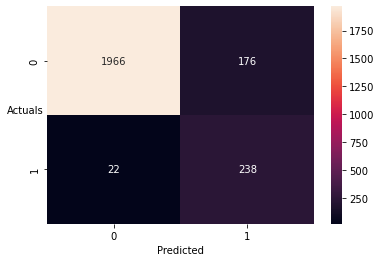

In [586]:
sns.heatmap((metrics.confusion_matrix(data_imputed_train['default'],y_class_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [587]:
print(metrics.classification_report(data_imputed_train['default'], y_class_pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.989     0.918     0.952      2142
         1.0      0.575     0.915     0.706       260

    accuracy                          0.918      2402
   macro avg      0.782     0.917     0.829      2402
weighted avg      0.944     0.918     0.925      2402



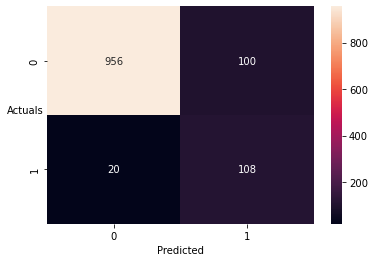

In [588]:
sns.heatmap((metrics.confusion_matrix(data_imputed_test['default'], y_class_pred_test)), annot = True,fmt = '.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals', rotation=0);

In [589]:
print(metrics.classification_report(data_imputed_test['default'], y_class_pred_test, digits=3))

              precision    recall  f1-score   support

         0.0      0.980     0.905     0.941      1056
         1.0      0.519     0.844     0.643       128

    accuracy                          0.899      1184
   macro avg      0.749     0.875     0.792      1184
weighted avg      0.930     0.899     0.909      1184



<b>1.8 Build a Random Forest Model on Train Dataset. Also showcase your model building approach

In [203]:
from sklearn.ensemble import RandomForestClassifier                         
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [204]:
X = data_combine2.drop(['default'], axis=1)
y = data_combine2['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=42,stratify=y)

In [205]:
param_grid = {
    'max_depth': [5,10],
    'max_features': [10,15],
    'min_samples_leaf': [30,35],
    'min_samples_split': [85,90,95]
}

rfcl = RandomForestClassifier(random_state=42)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

grid_search_rfcl.fit(X_train, y_train)
print(grid_search_rfcl.best_params_)
best_model_rf = grid_search_rfcl.best_estimator_

{'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 30, 'min_samples_split': 90}


<b>1.9 Validate the Random Forest Model on test Dataset and state the performance matrices. Also state interpretation from the model

In [206]:
print('Performance metrics of Random Forest Model on train data')
y_train_predict_rf = best_model_rf.predict(X_train)
model_score = best_model_rf.score(X_train, y_train)  
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_rf))         
print(metrics.classification_report(y_train, y_train_predict_rf))

Performance metrics of Random Forest Model on train data
Accuracy: 0.9675270607826811
[[2120   22]
 [  56  204]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2142
           1       0.90      0.78      0.84       260

    accuracy                           0.97      2402
   macro avg       0.94      0.89      0.91      2402
weighted avg       0.97      0.97      0.97      2402



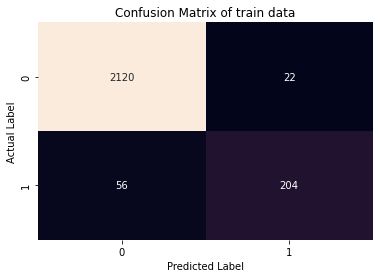

In [207]:
sns.heatmap(confusion_matrix(y_train, y_train_predict_rf),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of train data')
plt.show()

AUC of train data for Random Forest model: 0.991


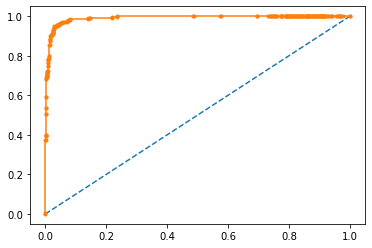

In [208]:
probs_rf = best_model_rf.predict_proba(X_train)
probs_rf = probs_rf[:, 1]
auc = roc_auc_score(y_train, probs_rf)
print('AUC of train data for Random Forest model: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [209]:
print('Performance metrics of Random Forest Model on test data')
y_test_predict_rf= best_model_rf.predict(X_test)
model_score = best_model_rf.score(X_test, y_test) 
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_rf))       
print(metrics.classification_report(y_test, y_test_predict_rf)) 

Performance metrics of Random Forest Model on test data
Accuracy: 0.9679054054054054
[[1052    4]
 [  34   94]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1056
           1       0.96      0.73      0.83       128

    accuracy                           0.97      1184
   macro avg       0.96      0.87      0.91      1184
weighted avg       0.97      0.97      0.97      1184



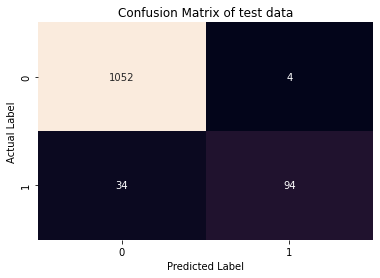

In [210]:
sns.heatmap(confusion_matrix(y_test, y_test_predict_rf),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of test data')
plt.show()

AUC of train data for Random Forest model: 0.986


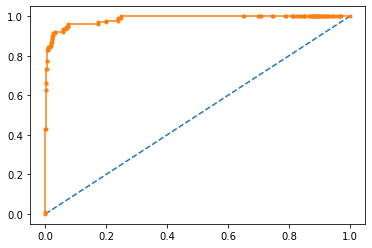

In [211]:
probs_rf = best_model_rf.predict_proba(X_test)
probs_rf = probs_rf[:, 1]
auc = roc_auc_score(y_test, probs_rf)
print('AUC of train data for Random Forest model: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

<b>1.10 Build a LDA Model on Train Dataset. Also showcase your model building approach

In [212]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [213]:
modelLDA=LinearDiscriminantAnalysis()
modelLDA.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [214]:
grid_lda={
    'solver' : ['svd', 'lsqr', 'eigen'],
    'tol' : [0.0001,0.00001]
         }

In [215]:
grid_search_lda = GridSearchCV(estimator = modelLDA, param_grid = grid_lda)
grid_search_lda

GridSearchCV(estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05]})

In [216]:
grid_search_lda.fit(X_train,y_train)

GridSearchCV(estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05]})

In [217]:
grid_search_lda.best_params_

{'solver': 'svd', 'tol': 0.0001}

In [218]:
grid_search_lda = grid_search_lda.best_estimator_

<b>1.11 Validate the LDA Model on test Dataset and state the performance matrices. Also state interpretation from the model

In [195]:
print('Performance metrics of LDA Model on train data')
y_train_predict_lda = grid_search_lda.predict(X_train)
model_score = grid_search_lda.score(X_train, y_train)  
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_lda))         
print(metrics.classification_report(y_train, y_train_predict_lda))

Performance metrics of LDA Model on train data
Accuracy: 0.9304746044962531
[[2118   24]
 [ 143  117]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2142
           1       0.83      0.45      0.58       260

    accuracy                           0.93      2402
   macro avg       0.88      0.72      0.77      2402
weighted avg       0.93      0.93      0.92      2402



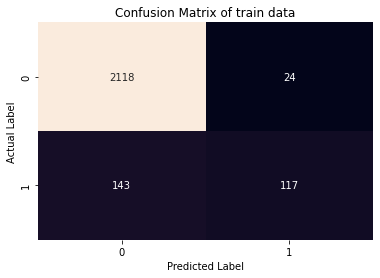

In [196]:
sns.heatmap(confusion_matrix(y_train, y_train_predict_lda),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of train data')
plt.show()

AUC of train data for LDA model: 0.949


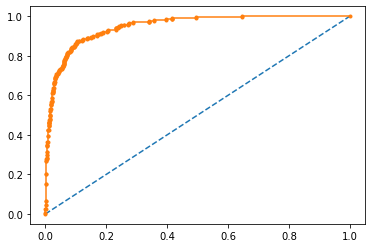

In [197]:
probs_lda = grid_search_lda.predict_proba(X_train)
probs_lda = probs_lda[:, 1]
auc = roc_auc_score(y_train, probs_lda)
print('AUC of train data for LDA model: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs_lda)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [198]:
print('Performance metrics of LDA Model on test data')
y_test_predict_lda= grid_search_lda.predict(X_test)
model_score = grid_search_lda.score(X_test, y_test) 
print('Accuracy:',model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_lda))       
print(metrics.classification_report(y_test, y_test_predict_lda)) 

Performance metrics of LDA Model on test data
Accuracy: 0.9206081081081081
[[1041   15]
 [  79   49]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1056
           1       0.77      0.38      0.51       128

    accuracy                           0.92      1184
   macro avg       0.85      0.68      0.73      1184
weighted avg       0.91      0.92      0.91      1184



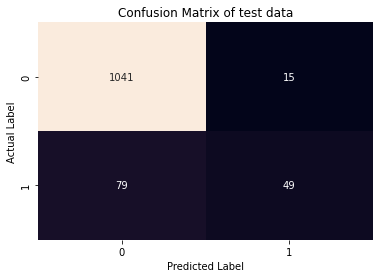

In [199]:
sns.heatmap(confusion_matrix(y_test, y_test_predict_lda),annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of test data')
plt.show()

AUC of train data for LDA model: 0.937


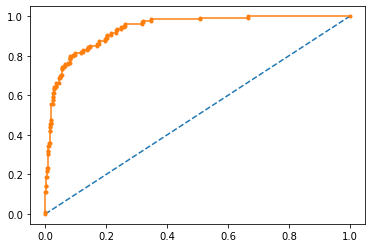

In [200]:
probs_lda = grid_search_lda.predict_proba(X_test)
probs_lda = probs_lda[:, 1]
auc = roc_auc_score(y_test, probs_lda)
print('AUC of train data for LDA model: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs_lda)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

<B>1.12 Compare the performances of Logistics, Radom Forest and LDA models (include ROC Curve)

AUC of train data for Logistic Regression model: 0.948


Text(0.5, 1.0, 'Test Data - ROC Curve')

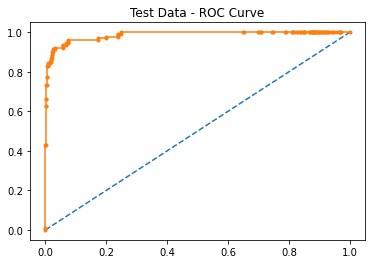

In [226]:
auc = roc_auc_score(y_train, y_prob_pred_train)
print('AUC of train data for Logistic Regression model: %.3f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('Train Data - ROC Curve')

AUC of test data for Logistic Regression model: 0.909


Text(0.5, 1.0, 'Test Data - ROC Curve')

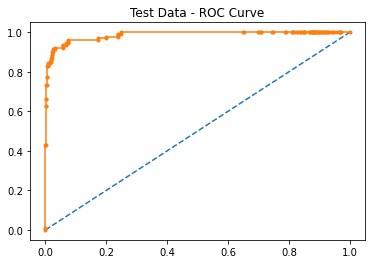

In [228]:
auc = roc_auc_score(y_test, y_prob_pred_test)
print('AUC of test data for Logistic Regression model: %.3f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('Test Data - ROC Curve')